# Introduction

###### This dataset contains information about 1000 students, as each row in the dataset represents one student. Differenet features, including gender, ethnicity, type of lunch, and different scores in different skills, are recorded about each student. This notebook aims to perform descriptive analytics and extract insights to make useful data-driven decisions.

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stdPerf.csv')

# Data Overview

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

# All the features have the proper data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

# Data contains 0 null values, no need for cleaning.

,0
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


In [6]:
df.describe().T

# The averages of all scores are very low, and 50% of students are getting marks between approximately 60 and 80

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


# Descriptive Analytics

## Univariate Analysis

### Study each variable independently

#### Gender

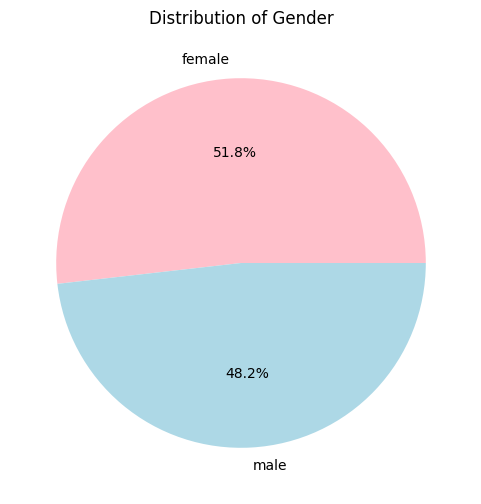

In [7]:
data = df['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(x=data.values, labels=data.index, colors=['pink', 'lightblue'], autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

#### Ethnicity

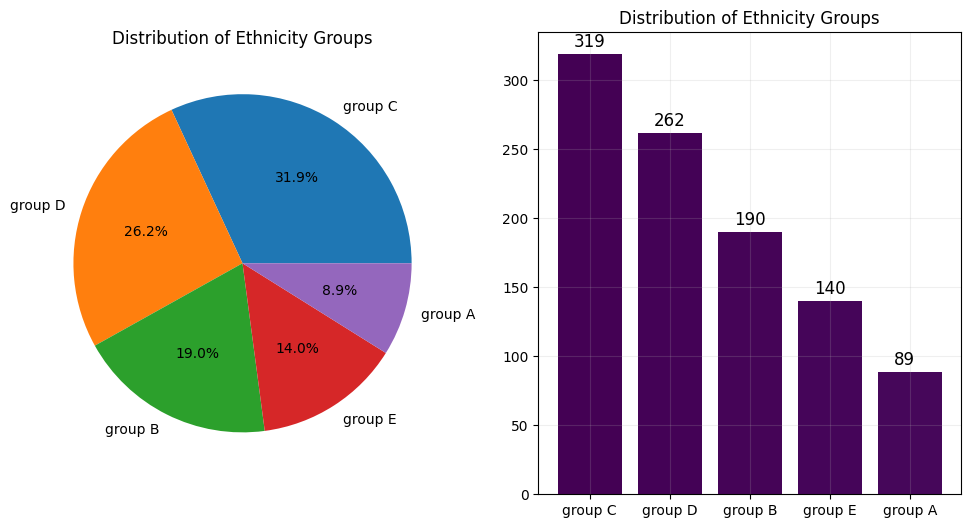

In [8]:
data = df['race/ethnicity'].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pie(x=data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Distribution of Ethnicity Groups')


colors = plt.cm.viridis(range(len(data)))
plt.subplot(122)
plt.bar(x=data.index, height=data.values, color=colors)
plt.grid(True, alpha=0.2)
plt.title('Distribution of Ethnicity Groups')

for i, value in enumerate(data.values):
  plt.text(i - 0.2, value + 5, f'{value}', c='black', fontsize=12)

plt.show()

#### Parental Level of Education

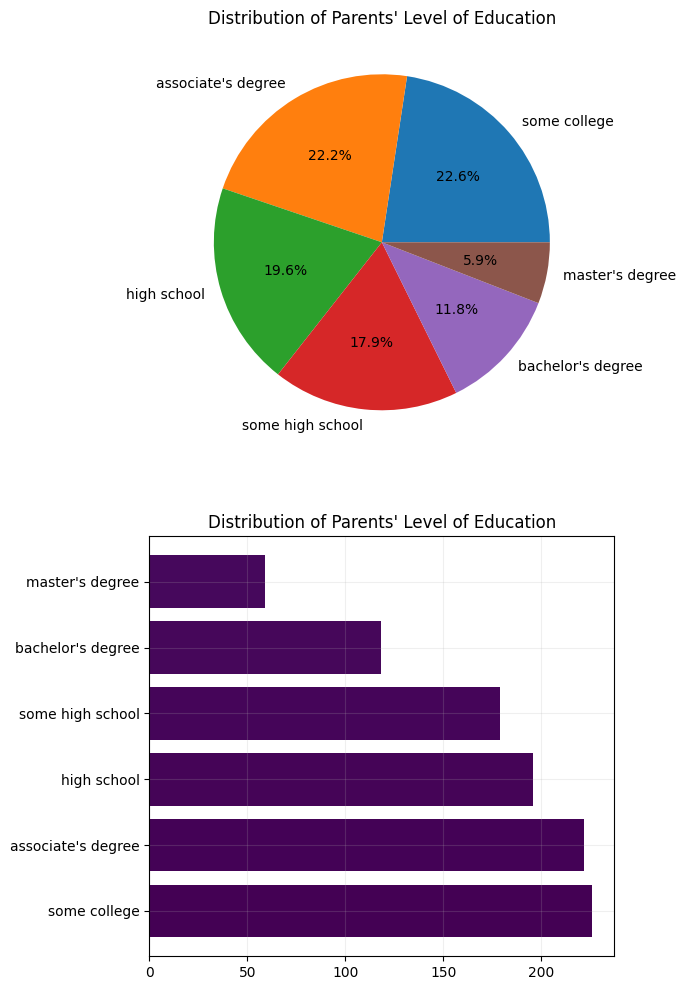

In [16]:
data = df['parental level of education'].value_counts()

plt.figure(figsize=(6,12))

plt.subplot(211)
plt.pie(x=data.values, labels=data.index, autopct='%1.1f%%')
plt.title("Distribution of Parents' Level of Education")


colors = plt.cm.viridis(range(len(data)))
plt.subplot(212)
plt.barh(y=data.index, width=data.values, color=colors)
plt.grid(True, alpha=0.2)
plt.title("Distribution of Parents' Level of Education")

plt.show()

#### Lunch

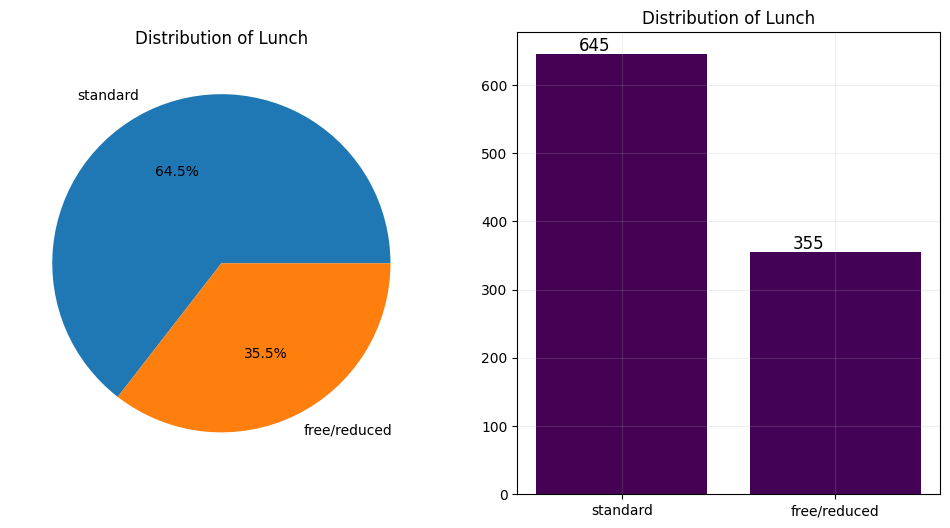

In [18]:
data = df['lunch'].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pie(x=data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Distribution of Lunch')


colors = plt.cm.viridis(range(len(data)))
plt.subplot(122)
plt.bar(x=data.index, height=data.values, color=colors)
plt.grid(True, alpha=0.2)
plt.title('Distribution of Lunch')

for i, value in enumerate(data.values):
  plt.text(i - 0.2, value + 5, f'{value}', c='black', fontsize=12)

plt.show()

#### Test Preparation Course

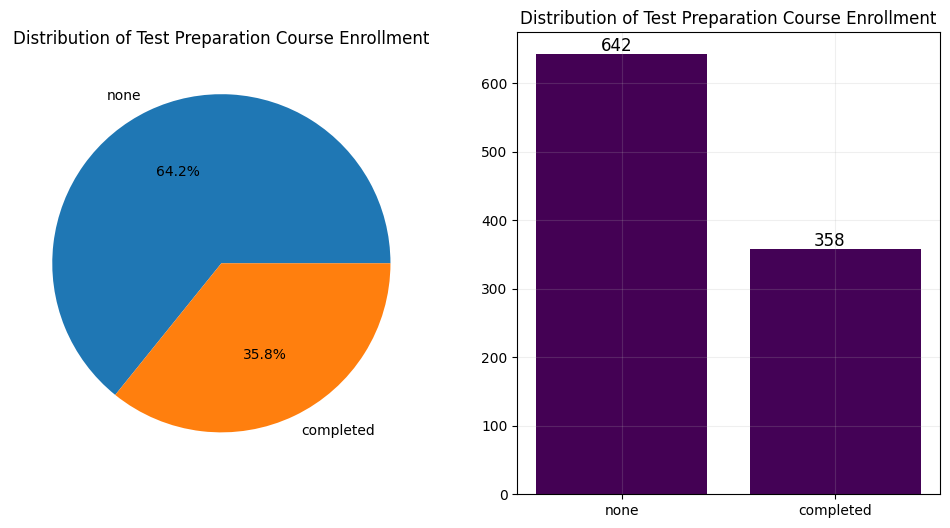

In [22]:
data = df['test preparation course'].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pie(x=data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Distribution of Test Preparation Course Enrollment')


colors = plt.cm.viridis(range(len(data)))
plt.subplot(122)
plt.bar(x=data.index, height=data.values, color=colors)
plt.grid(True, alpha=0.2)
plt.title('Distribution of Test Preparation Course Enrollment')

for i, value in enumerate(data.values):
  plt.text(i - 0.1, value + 5, f'{value}', c='black', fontsize=12)

plt.show()

#### Math Score

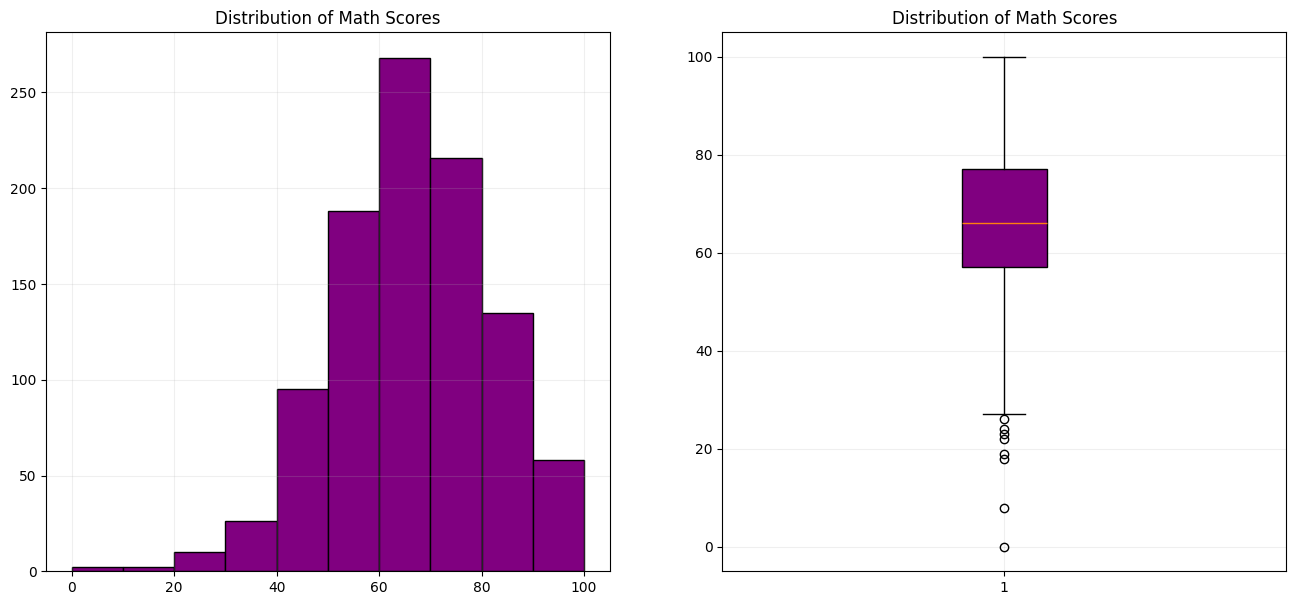

In [78]:
data = df['math score']

plt.figure(figsize=(16,7))

plt.subplot(121)
plt.hist(data, edgecolor='black', color='purple')
plt.title('Distribution of Math Scores')
plt.grid(True, alpha=0.2)

plt.subplot(122)
plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.title('Distribution of Math Scores')
plt.grid(True, alpha=0.2)

plt.show()

In [115]:
z_scores = (df['math score'] - df['math score'].mean()) / df['math score'].std()

print(f'Max z-score for math scores: {z_scores.max()}')
print(f'Min z-score for math scores: {z_scores.min()}')

# There are low-end outliers for math

z_scores = z_scores.sort_values(ascending=False)

ids = z_scores.tail(15).index

df.iloc[ids]

# Students performing bad in math are mostly girls, get free lunch, take no preparation test, and perform bad in all other subjects

Max z-score for math scores: 2.2364189719557377
Min z-score for math scores: -4.358547180489597


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
596,male,group B,high school,free/reduced,none,30,24,15
528,female,group D,bachelor's degree,free/reduced,none,29,41,47
683,female,group C,some high school,free/reduced,completed,29,40,44
601,female,group C,high school,standard,none,29,29,30
327,male,group A,some college,free/reduced,none,28,23,19
91,male,group C,high school,free/reduced,none,27,34,36
363,female,group D,some high school,free/reduced,none,27,34,32
466,female,group D,associate's degree,free/reduced,none,26,31,38
338,female,group B,some high school,free/reduced,none,24,38,27
842,female,group B,high school,free/reduced,completed,23,44,36


#### Reading Score

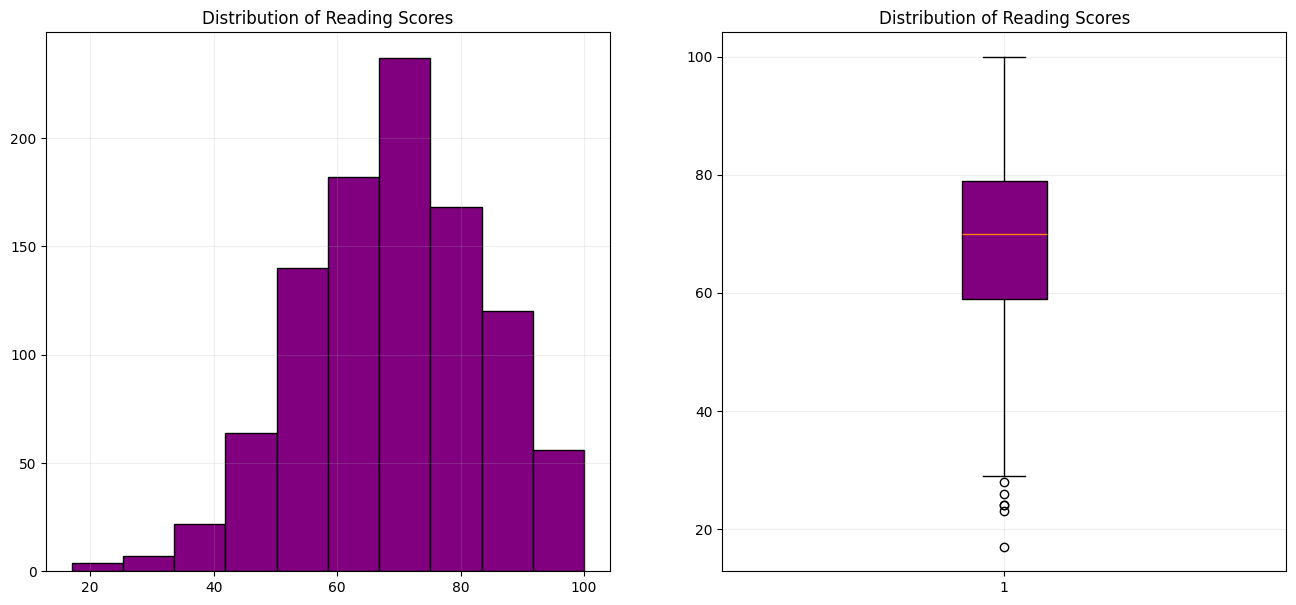

In [99]:
data = df['reading score']

plt.figure(figsize=(16,7))

plt.subplot(121)
plt.hist(data, edgecolor='black', color='purple')
plt.title('Distribution of Reading Scores')
plt.grid(True, alpha=0.2)

plt.subplot(122)
plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.title('Distribution of Reading Scores')
plt.grid(True, alpha=0.2)

plt.show()

In [118]:
z_scores = (df['reading score'] - df['reading score'].mean()) / df['reading score'].std()

print(f'Max z-score for reading scores: {z_scores.max()}')
print(f'Min z-score for reading scores: {z_scores.min()}')

# There are low-end outliers for reading

z_scores = z_scores.sort_values(ascending=False)

ids = z_scores.tail(15).index

df.iloc[ids]

# Students performing bad in reading take no preparation test, and perform bad in all other subjects

Max z-score for reading scores: 2.1116845677442817
Min z-score for reading scores: -3.573172203777089


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
895,female,group E,some high school,free/reduced,none,32,34,38
363,female,group D,some high school,free/reduced,none,27,34,32
706,male,group D,high school,standard,none,46,34,36
91,male,group C,high school,free/reduced,none,27,34,36
17,female,group B,some high school,free/reduced,none,18,32,28
810,male,group A,some high school,standard,none,51,31,36
466,female,group D,associate's degree,free/reduced,none,26,31,38
601,female,group C,high school,standard,none,29,29,30
896,male,group B,high school,free/reduced,none,36,29,27
211,male,group C,some college,free/reduced,none,35,28,27


#### Writing Score

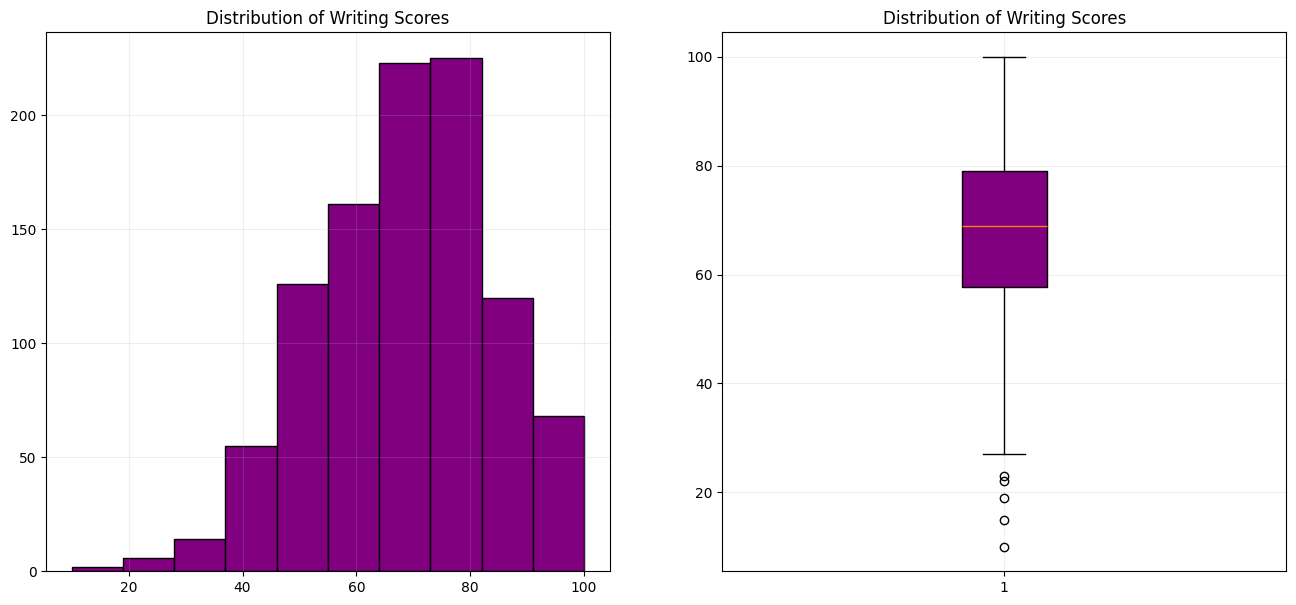

In [119]:
data = df['writing score']

plt.figure(figsize=(16,7))

plt.subplot(121)
plt.hist(data, edgecolor='black', color='purple')
plt.title('Distribution of Writing Scores')
plt.grid(True, alpha=0.2)

plt.subplot(122)
plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.title('Distribution of Writing Scores')
plt.grid(True, alpha=0.2)

plt.show()

In [121]:
z_scores = (df['writing score'] - df['writing score'].mean()) / df['writing score'].std()

print(f'Max z-score for writing scores: {z_scores.max()}')
print(f'Min z-score for writing scores: {z_scores.min()}')

# There are low-end outliers for writing

z_scores = z_scores.sort_values(ascending=False)

ids = z_scores.tail(15).index

df.iloc[ids]

# Students performing bad in math are mostly girls, get free lunch, take no preparation test, and perform bad in all other subjects

Max z-score for writing scores: 2.1023112049152353
Min z-score for writing scores: -3.820433690920587


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
84,male,group D,high school,free/reduced,none,42,39,34
555,female,group C,some college,free/reduced,none,32,39,33
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
363,female,group D,some high school,free/reduced,none,27,34,32
601,female,group C,high school,standard,none,29,29,30
17,female,group B,some high school,free/reduced,none,18,32,28
896,male,group B,high school,free/reduced,none,36,29,27
211,male,group C,some college,free/reduced,none,35,28,27
338,female,group B,some high school,free/reduced,none,24,38,27


### Multivariate Analysis

#### Ethnicity vs Lunch

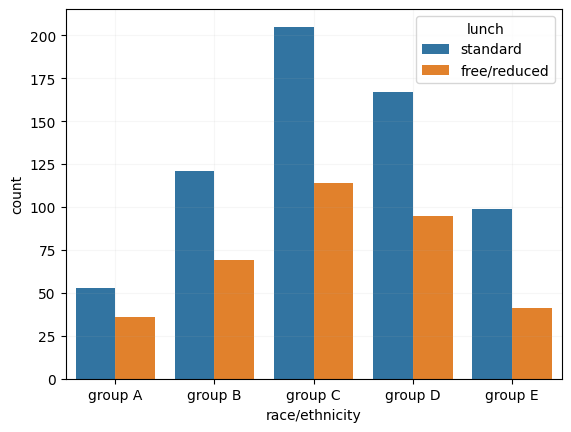

In [47]:
sns.countplot(data=df, x='race/ethnicity', hue='lunch', order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.grid(alpha=0.1)

#### Gender vs Parental Level of Education

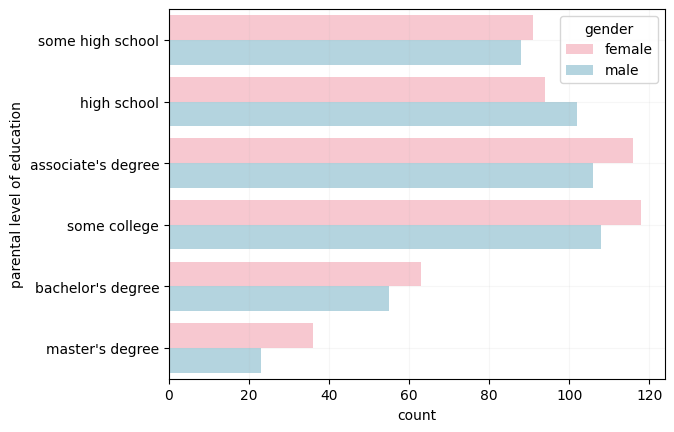

In [61]:
sns.countplot(data=df, y='parental level of education', hue='gender', palette=['pink', 'lightblue'], order=['some high school', 'high school', "associate's degree", 'some college', "bachelor's degree", "master's degree"])
plt.grid(alpha=0.1)

#### Ethnicity vs Parental Level of Education

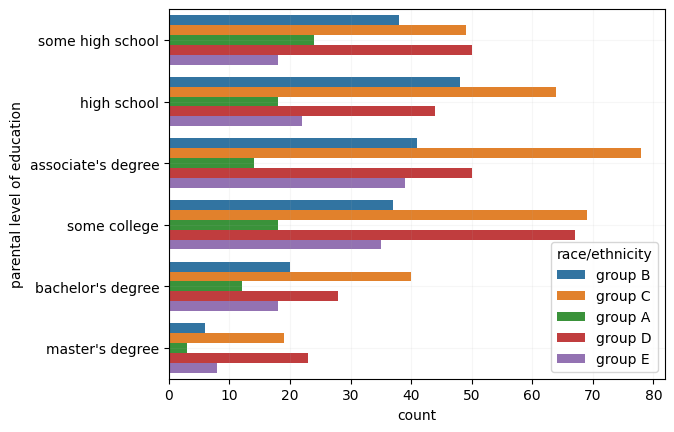

In [62]:
sns.countplot(data=df, y='parental level of education', hue='race/ethnicity', order=['some high school', 'high school', "associate's degree", 'some college', "bachelor's degree", "master's degree"])
plt.grid(alpha=0.1)

#### Math Score vs Reading Score

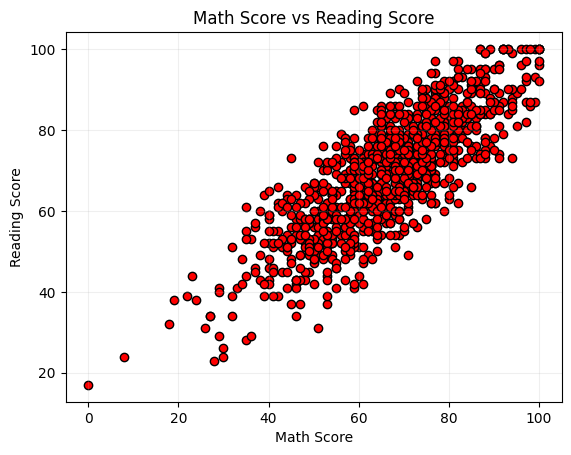

In [97]:
plt.scatter(x=df['math score'], y=df['reading score'], c='red', edgecolor='black')
plt.grid(alpha=0.2)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs Reading Score')
plt.show()

#### Math Score vs Writing Score

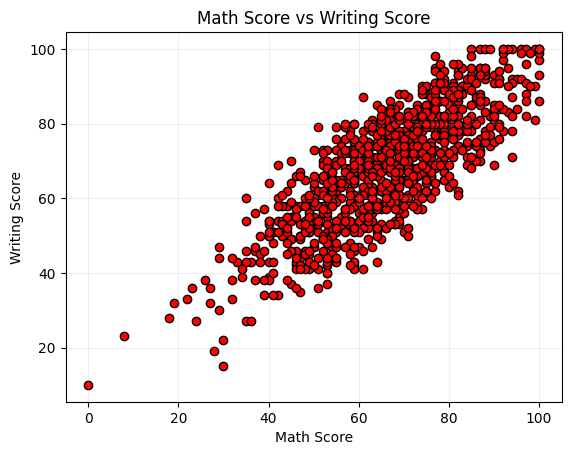

In [72]:
plt.scatter(x=df['math score'], y=df['writing score'], c='red', edgecolor='black')
plt.grid(alpha=0.2)
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

#### Reading Score vs Writing Score

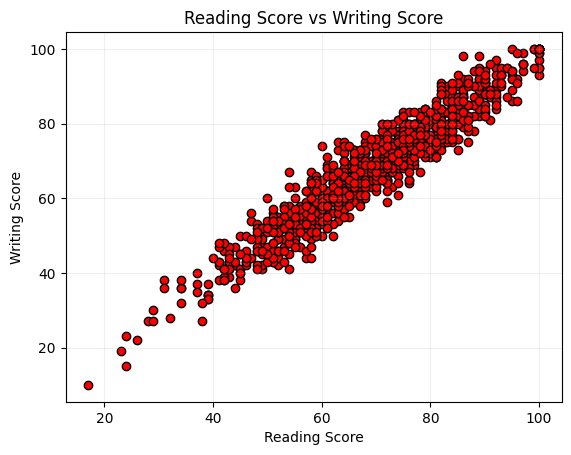

In [73]:
plt.scatter(x=df['reading score'], y=df['writing score'], c='red', edgecolor='black')
plt.grid(alpha=0.2)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Reading Score vs Writing Score')
plt.show()

#### Scores Correlation Matrix

<Axes: title={'center': 'Correlation Matrix'}>

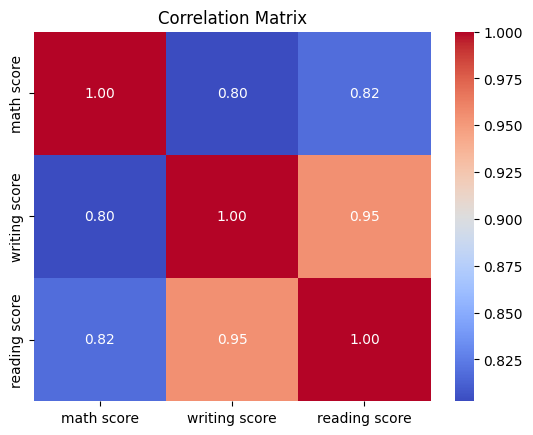

In [77]:
data = df[['math score', 'writing score', 'reading score']]

plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')

#### Gender vs Average Score

In [133]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

print(f'Average score for females: {df.loc[df["gender"]== "female", "average score"].mean()}')
print(f'Average score for males: {df.loc[df["gender"]== "male", "average score"].mean()}')

Average score for females: 69.56949806949807
Average score for males: 65.8374827109267


#### Lunch vs Test Preparation Course Enrollment

In [138]:
pd.crosstab(index=df['lunch'], columns=df['test preparation course'])

test preparation course,completed,none
lunch,,
free/reduced,131,224
standard,227,418


In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Insights

1. Data is not gender-biased, so any gender-biased result is likely not due to sample imbalance
2. Postgraduate education is relatively rare among the parents surveyed, indicating a ceiling around the undergraduate level.
3.  A significant portion of students rely on free or reduced lunch, which commonly indicates financial hardship at home.
4. Approximately two-thirds of the students did not enroll in the test preparation course. This could be due to different reasons including lack of discipline of financial challenges.
5. A small group of students may be struggling significantly with math and may need targeted intervention or support.
6. Students' performance in reading is better than their performance in math and writing, incidating that the reading-teaching technique they use is somewhat better than math and writing techniques.
7. All ethnicity groups may have greater financial need, making them good candidates for educational support programs, meal initiatives, or fee waivers.
8. There's a possible socioeconomic divide within Group C — with students split between high and low income brackets. Programs targeting economic equity may find strong impact here.
9. Any school policy or resource distribution should prioritize Group C, as it represents the largest portion of students.
10. Advanced parental education is rare, which might impact the availability of high-level academic help at home — especially for gifted students.
11. The majority of students come from moderately educated households. Resources and teaching materials can likely assume basic to intermediate parental academic support at home.
12. Group D likely represents a stable, middle-income bracket, which may align with average academic performance. Ideal group for testing baseline interventions or new learning strategies.
13. The scores in math, reading, and writing are highly positively correlated. Students who do well in one subject tend to perform well in the others, meaning that skill or motivation in one area spills over into the others.
14. Schools can bundle reading/writing programs for greater efficiency.
15. Schools can predict at-risk students earlier and intervene faster using just 1 or 2 subject scores.
16. For the scores outliers, we will keep them, as all marks are correlated. So if a student has a low mark in one subject, he has low marks in the rest, so it is most likely not a data-entry issue.
17. Female students are performing better than males students, most likely due to their parents' academic level.
18. All students, whether they get free or standard lunch, tend to not take the test preparation course, indicating their lack of interest rather financial challenges.